# Artificial Neural Network

### Importing the libraries

In [18]:
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf

## Part 1 - Data Preprocessing

### Importing the dataset

In [19]:
dataset = pd.read_csv("/Users/tonderaimadamba/Documents/Python/ML/Titanic Data/Titanic Data/full.csv")


<AxesSubplot:>

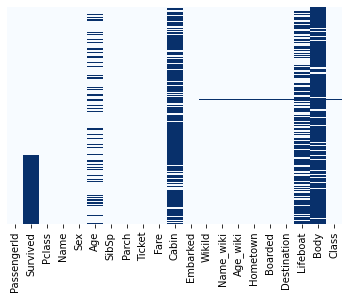

In [20]:
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [21]:
dataset2 = dataset.dropna(axis=0, how='any', thresh=None, subset="Survived", inplace=False)
dataset2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,S,514.0,"Montvila, Father Juozas",27.0,"Gudinė, Lithuania [76]",Southampton,"Worcester, Massachusetts, US",NaN,NaN,2.0
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,S,137.0,"Graham, Miss Margaret Edith",19.0,"Greenwich, Connecticut, US",Southampton,"Greenwich, Connecticut, US",3,NaN,1.0
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,...,S,910.0,"Johnston, Miss Catherine Nellie",7.0,"Thornton Heath, London, England",Southampton,"New London, Connecticut, US",NaN,NaN,3.0
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,C,28.0,"Behr, Mr. Karl Howell",26.0,"New York, New York, US",Cherbourg,"New York, New York, US",5,NaN,1.0


<AxesSubplot:>

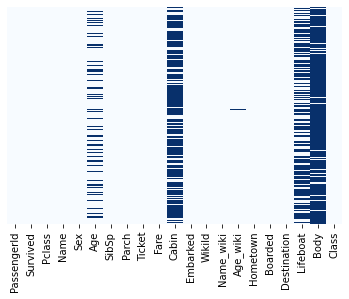

In [22]:
sns.heatmap(dataset2.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [23]:
dataset3 = dataset2.copy()

In [24]:
def myfunc_0(x):
    if pd.isna(x) == True:
        i = np.random.normal(dataset2.Age_wiki.mean(),dataset2.Age_wiki.std())
        if i < 0:   
            while i < 0: 
                i = np.random.normal(dataset2.Age_wiki.mean(),dataset2.Age_wiki.std())
                if i > 0:
                    return(i)
                    break
        else: return i
    else: return x

In [25]:
for i in range(len(dataset2)):
    dataset3.Age_wiki[i] = myfunc_0(dataset2.Age_wiki[i])

/var/folders/8g/g8wt7qjs1d162gzvz0xhgr3c0000gp/T/ipykernel_81894/3617046858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset3.Age_wiki[i] = myfunc_0(dataset2.Age_wiki[i])


<AxesSubplot:>

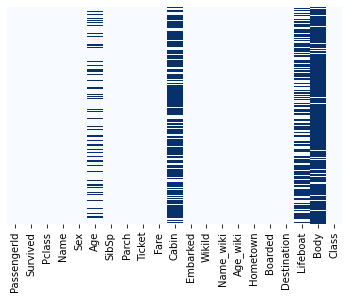

In [26]:
sns.heatmap(dataset3.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [27]:
dataset3.Cabin = dataset2.Cabin.fillna('Unknown')
dataset3.Lifeboat = dataset2.Lifeboat.fillna('Unknown')

In [28]:
dataset4 = dataset3.copy()

Turn Lifeboat into a yes or no question/senario unknown or known to have a lifeboat And Cabin. 

In [29]:
def myfunc_1(x):
    if x != 'Unknown':
            return x[0]
    else: return x


In [30]:
for i in range(len(dataset3)):
    dataset4.Cabin[i] = myfunc_1(dataset3.Cabin[i])

/var/folders/8g/g8wt7qjs1d162gzvz0xhgr3c0000gp/T/ipykernel_81894/4229070508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset4.Cabin[i] = myfunc_1(dataset3.Cabin[i])


In [31]:
dataset4.Cabin.value_counts()

Unknown    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: Cabin, dtype: int64

In [32]:
dataset5 = dataset4.copy()

In [33]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(timeout=10,user_agent="Some_Stuff")

In [34]:
dataset5.Hometown =  dataset4.Hometown.str.split(',').str[-1]
for i in range(len(dataset4)):
   X = geolocator.geocode(dataset5.Hometown[i], language="en")
   if X != None:
      p = X[0]
   else: p = X
   print(p)
   print(type(p))
   print(i)

England, United Kingdom
<class 'str'>
0
United States
<class 'str'>
1
Finland
<class 'str'>
2
United States
<class 'str'>
3
England, United Kingdom
<class 'str'>
4
Ireland
<class 'str'>
5
United States
<class 'str'>
6
Sweden
<class 'str'>
7
United States
<class 'str'>
8
None
<class 'NoneType'>
9
Sweden
<class 'str'>
10
United States
<class 'str'>
11
England, United Kingdom
<class 'str'>
12
Sweden
<class 'str'>
13
Sweden
<class 'str'>
14
United Kingdom
<class 'str'>
15
Ireland
<class 'str'>
16
England, United Kingdom
<class 'str'>
17
Belgium
<class 'str'>
18
Lebanon
<class 'str'>
19
United Kingdom
<class 'str'>
20
United Kingdom
<class 'str'>
21
Ireland
<class 'str'>
22
United States
<class 'str'>
23
Sweden
<class 'str'>
24
Sweden
<class 'str'>
25
Lebanon
<class 'str'>
26
Canada
<class 'str'>
27
Ireland
<class 'str'>
28
Bulgaria
<class 'str'>
29
Mexico
<class 'str'>
30
United States
<class 'str'>
31
Ireland
<class 'str'>
32
Channel Islands, Ventura County, California, United States
<cla

In [35]:
dataset6 = dataset5.copy()

In [36]:
dataset6.Hometown = dataset5.Hometown.str.split(', ').str[-1]
dataset6.Hometown.value_counts()

 US                        192
 England                   169
 Ireland                    75
 Sweden                     70
 UK                         46
 Finland                    44
 Lebanon                    44
 Canada                     28
 Bulgaria                   27
 France                     23
 Croatia                    21
 Norway                     19
 Belgium                    18
 Switzerland                11
 Syria                       7
 China                       7
 Channel Islands             7
 Denmark                     7
 Wales                       6
 Spain                       5
 Argentina                   5
 Slovenia                    4
 Russian Empire[note 6]      3
 Bosnia                      3
New York City                3
 Scotland                    3
 Portugal                    3
Russia                       2
 Ireland[note 1]             2
 British India               2
 Germany                     2
 Russia                      2
 Russian

<AxesSubplot:>

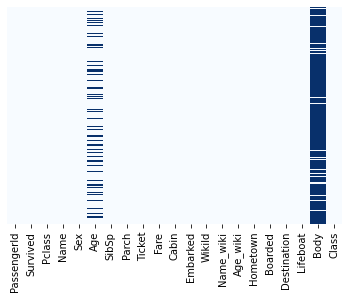

In [37]:
sns.heatmap(dataset6.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [38]:
# Droping the not so usefull information
# PassengerId", "Name", "Age","Ticket", "WikiId","Name_wiki", are very unique 
# Age we are using Age_wiki not age same info one has more information
# Embarked and borded are the same information, 
# Destination & Body is mostly america doesnt make that much sense to include 

dataset7 = dataset6.drop(["PassengerId", "Name", "Age","Ticket", "WikiId","Name_wiki","Destination","Embarked", "Body"],1) 

/var/folders/8g/g8wt7qjs1d162gzvz0xhgr3c0000gp/T/ipykernel_81894/173045643.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataset7 = dataset6.drop(["PassengerId", "Name", "Age","Ticket", "WikiId","Name_wiki","Destination","Embarked", "Body"],1)


<AxesSubplot:>

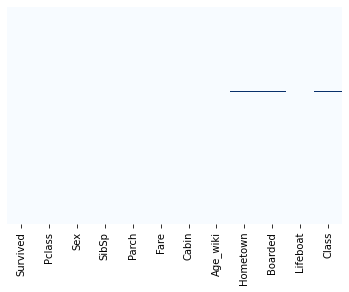

In [39]:
sns.heatmap(dataset7.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [40]:
# Replace NaN with unknown since these are class variables the worst thing that can 
# happen is creating an additional class variable not a big deal at all.
# There are more than 2 classes for the classes we added the unknows OneHotEncoder was always going to be used anyways.

In [64]:
#dataset8 = dataset7.fillna('Unknown')
dataset8 = dataset7.dropna(axis=0, how='any', thresh=None, inplace=False)
dataset9 = dataset8.copy()
dataset9 

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Age_wiki,Hometown,Boarded,Lifeboat,Class
0,0.0,3,male,1,0,7.2500,Unknown,22.0,England,Southampton,Unknown,3.0
1,1.0,1,female,1,0,71.2833,C,35.0,US,Cherbourg,4,1.0
2,1.0,3,female,0,0,7.9250,Unknown,26.0,Finland,Southampton,14?,3.0
3,1.0,1,female,1,0,53.1000,C,35.0,US,Southampton,D,1.0
4,0.0,3,male,0,0,8.0500,Unknown,35.0,England,Southampton,Unknown,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,male,0,0,13.0000,Unknown,27.0,Lithuania [76],Southampton,Unknown,2.0
887,1.0,1,female,0,0,30.0000,B,19.0,US,Southampton,3,1.0
888,0.0,3,female,1,2,23.4500,Unknown,7.0,England,Southampton,Unknown,3.0
889,1.0,1,male,0,0,30.0000,C,26.0,US,Cherbourg,5,1.0


### Encoding categorical data

Label Encoding the "Gender/Sex" column

One Hot Encoding the "Everything else that has multiple chartegories" column

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [66]:
dataset9_Sex_Encoded = pd.DataFrame(le.fit_transform(dataset9.Sex))

In [67]:
dataset10  = pd.merge(dataset9[['Survived','Fare','Age_wiki']], pd.get_dummies(dataset9.Pclass), how='inner', left_index=True, right_index=True)
dataset10 = pd.merge(dataset10, dataset9_Sex_Encoded, how='inner', left_index=True, right_index=True)
dataset10 = pd.merge(dataset10, pd.get_dummies(dataset9.SibSp), how='inner', left_index=True, right_index=True)
dataset10 = pd.merge(dataset10, pd.get_dummies(dataset9.Parch), how='inner', left_index=True, right_index=True)
dataset10 = pd.merge(dataset10, pd.get_dummies(dataset9.Cabin), how='inner', left_index=True, right_index=True)
dataset10 = pd.merge(dataset10, pd.get_dummies(dataset9.Hometown), how='inner', left_index=True, right_index=True)
dataset10 = pd.merge(dataset10, pd.get_dummies(dataset9.Boarded), how='inner', left_index=True, right_index=True)
dataset10 = pd.merge(dataset10, pd.get_dummies(dataset9.Class), how='inner', left_index=True, right_index=True)
dataset10



/var/folders/8g/g8wt7qjs1d162gzvz0xhgr3c0000gp/T/ipykernel_81894/804687465.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'1_x', '3_x', '2_x'} in the result is deprecated and will raise a MergeError in a future version.
  dataset10 = pd.merge(dataset10, pd.get_dummies(dataset9.Class), how='inner', left_index=True, right_index=True)


,Survived,Fare,Age_wiki,1_x,2_x,3_x,0_x,0_y,1_y,2_y,...,Wales,New York City,Russia,Belfast,Cherbourg,Queenstown,Southampton,1.0_y,2.0_y,3.0_y
0,0.0,7.2500,22.0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,1.0,71.2833,35.0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,1.0,7.9250,26.0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1.0,53.1000,35.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
4,0.0,8.0500,35.0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.0,7.0500,25.0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
885,0.0,29.1250,39.0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
886,0.0,13.0000,27.0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
887,1.0,30.0000,19.0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,1,1,0,0


In [68]:
final_data = dataset10

In [69]:
X = final_data.iloc[:,1:].values
y = final_data.iloc[:,0].values
#y.head(5)

### Splitting the dataset into the Training set and Test set

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [71]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-0.33962421, -0.17102335, -0.56160385, ..., -0.56160385,
        -0.52238921,  0.912163  ],
       [-0.34515632, -0.17102335, -0.56160385, ..., -0.56160385,
        -0.52238921,  0.912163  ],
       [-0.5236114 , -0.0311627 , -0.56160385, ..., -0.56160385,
        -0.52238921,  0.912163  ],
       ...,
       [-0.52342859,  1.50730455, -0.56160385, ..., -0.56160385,
        -0.52238921,  0.912163  ],
       [-0.505113  ,  0.73807093, -0.56160385, ..., -0.56160385,
        -0.52238921,  0.912163  ],
       [ 0.18676388, -1.0101873 , -0.56160385, ..., -0.56160385,
        -0.52238921,  0.912163  ]])

## Part 2 - Building the An XGBoost model

In [ ]:
# from xgboost import XGBClassifier
# classifier = XGBClassifier()
# classifier.fit(X_train, y_train)

In [ ]:
# from sklearn.metrics import confusion_matrix, accuracy_score
# y_pred = classifier.predict(X_test)
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
# accuracy_score(y_test, y_pred)

## Part 2 - Building the ANN

### Initializing the ANN

In [72]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [73]:
ann.add(tf.keras.layers.Dense(units=56, activation='relu'))

### Adding the second hidden layer

In [74]:
ann.add(tf.keras.layers.Dense(units=56, activation='relu'))

In [75]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Adding the output layer

In [76]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Part 3 - Training the ANN

### Training the ANN on the Training set

In [77]:
ann.fit(X_train, y_train, batch_size = 10, epochs = 300)

Epoch 1/300
 9/71 [==>...........................] - ETA: 0s - loss: 0.8630 - accuracy: 0.5556 

2022-07-13 13:29:44.114605: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


71/71 [==============================] - 1s 7ms/step - loss: 0.6923 - accuracy: 0.6291
Epoch 2/300
71/71 [==============================] - 0s 7ms/step - loss: 0.5671 - accuracy: 0.7236
Epoch 3/300
71/71 [==============================] - 0s 6ms/step - loss: 0.5127 - accuracy: 0.7546
Epoch 4/300
71/71 [==============================] - 0s 6ms/step - loss: 0.4854 - accuracy: 0.7687
Epoch 5/300
71/71 [==============================] - 0s 6ms/step - loss: 0.4591 - accuracy: 0.7842
Epoch 6/300
71/71 [==============================] - 0s 7ms/step - loss: 0.4428 - accuracy: 0.7884
Epoch 7/300
71/71 [==============================] - 0s 6ms/step - loss: 0.4279 - accuracy: 0.7913
Epoch 8/300
71/71 [==============================] - 0s 6ms/step - loss: 0.4226 - accuracy: 0.8025
Epoch 9/300
71/71 [==============================] - 0s 6ms/step - loss: 0.4126 - accuracy: 0.8054
Epoch 10/300
71/71 [==============================] - 0s 6ms/step - loss: 0.4035 - accuracy: 0.8054
Epoch 11/300
71/71 [=

## Part 4 - Making the predictions and evaluating the model

### Predicting the Test set results

In [61]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

2022-07-13 13:16:01.521148: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 0s 7ms/step
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 1.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [1.

### Making the Confusion Matrix

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[96 14]
 [19 50]]


0.8156424581005587